In [289]:
#import packages
import numpy as np
from numpy import linalg as LA
import math 

import matplotlib.pyplot as plt
from matplotlib import cm, colors
from mpl_toolkits.mplot3d import Axes3D

#change trigonometric functions name
pi = np.pi
cos = np.cos
sin = np.sin
arccos = np.arccos

<IPython.core.display.Javascript object>


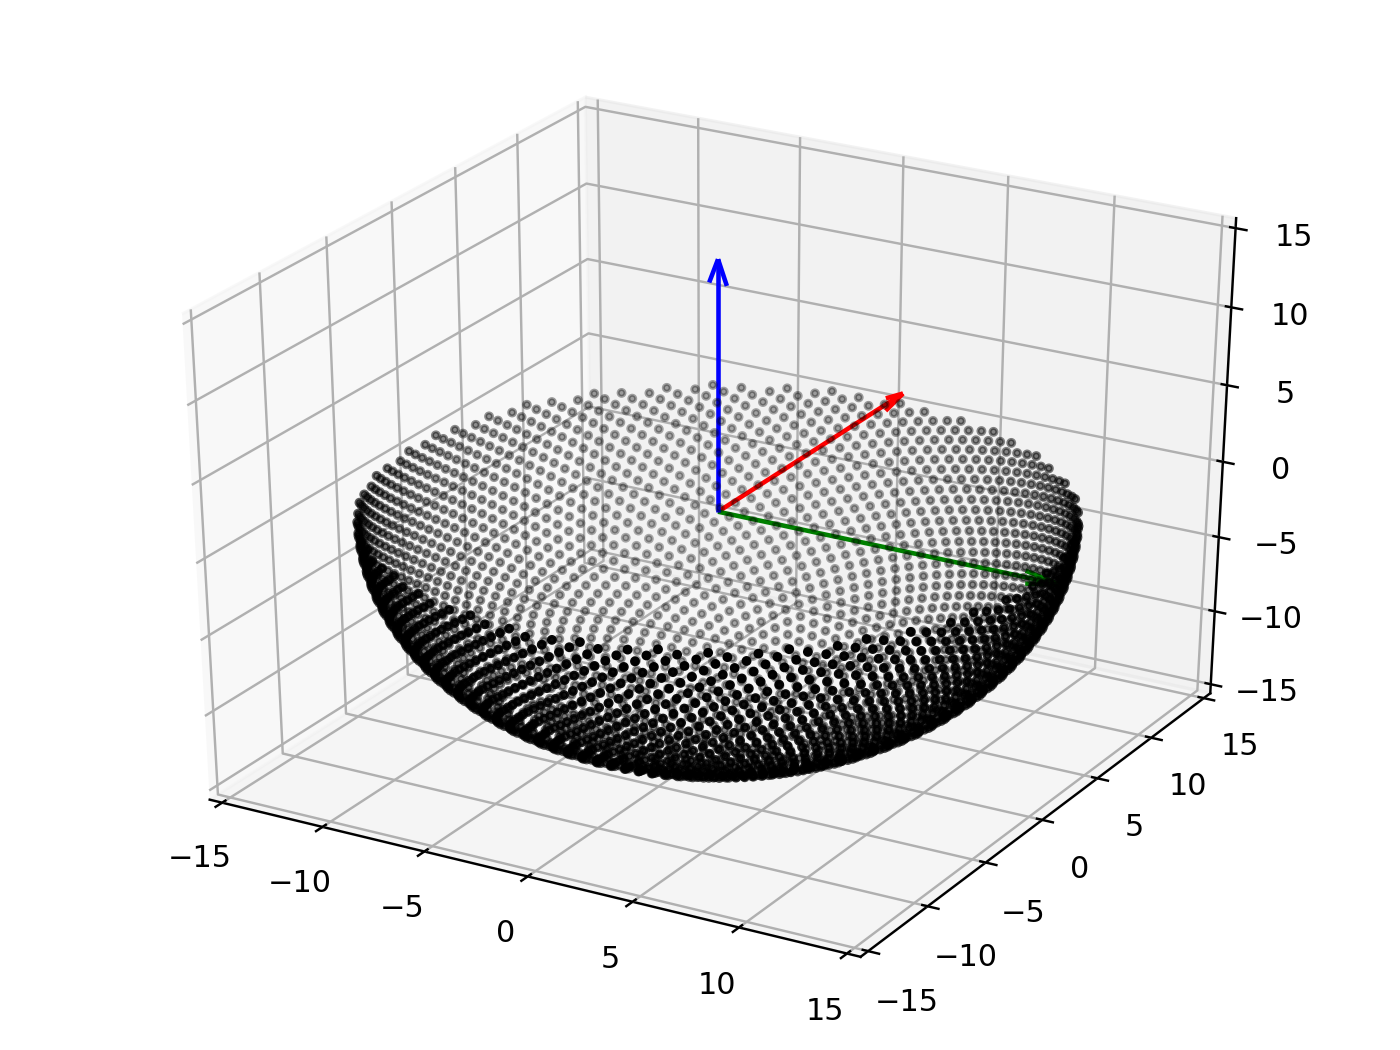

In [303]:
# Create a sphere of 15 mm and distribute equally distanced points
r = 15 #mm

#https://web.archive.org/web/20120107030109/http://cgafaq.info/wiki/Evenly_distributed_points_on_sphere#Spirals
# alternative--> https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3223966/#APP1

N=6000
dlong= pi*(3-np.sqrt(5)) # /* ~2.39996323 */
dz= 2.0/N
long= 0
z= 1 - dz/2
node=[]

for k in range(N):
    R = np.sqrt(1-z*z)
    node.append((cos(long)*R, sin(long)*R, z))
    z = z - dz
    long= long + dlong
    
node=np.array(node)

x0,y0,z0=r*node[:,0],r*node[:,1],r*node[:,2]

# choose only backside of sphere
z_exclude=0

x=np.delete(x0,np.where(z0>z_exclude))
y=np.delete(y0,np.where(z0>z_exclude))
z=np.delete(z0,np.where(z0>z_exclude))

%matplotlib notebook
#Set colours and render
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
#ax.plot_surface(x, y, z,  rstride=1, cstride=1, color='c', alpha=0.1, linewidth=0)

ax.quiver(0, 0, 0, 16, 0, 0, arrow_length_ratio=0.1,color="g") #x
ax.quiver(0, 0, 0, 0, 16, 0, arrow_length_ratio=0.1,color="r") #y
ax.quiver(0, 0, 0, 0, 0, 16, arrow_length_ratio=0.1,color="b") #z

ax.scatter(x,y,z,color="k",s=5)

ax.set_xlim([-15,15])
ax.set_ylim([-15,15])
ax.set_zlim([-15,15])

plt.tight_layout()
#plt.show()

In [304]:
#chose focal point for pinhole model
z_point=20
f_point=[0,0,z_point]

#describe sensor plane
z_plane=38
plane_origin=[0,0,z_plane]
plane_normal=[0,0,1]

In [305]:
#compute intersection as in https://en.wikipedia.org/wiki/Line%E2%80%93plane_intersection
d=np.dot(plane_normal,plane_origin)
x_c=[]
y_c=[]
z_c=[]

for i in range(len(x)):
    O=[x[i],y[i],z[i]]
    ray=-(np.array(O)-np.array(f_point))
    ray=ray/np.linalg.norm(ray)
    t=(d-np.dot(plane_normal,O))/np.dot(plane_normal,ray)
    new_ray=ray*t
    contact=O+new_ray
    x_c.append(contact[0])
    y_c.append(contact[1])
    z_c.append(contact[2])

<IPython.core.display.Javascript object>


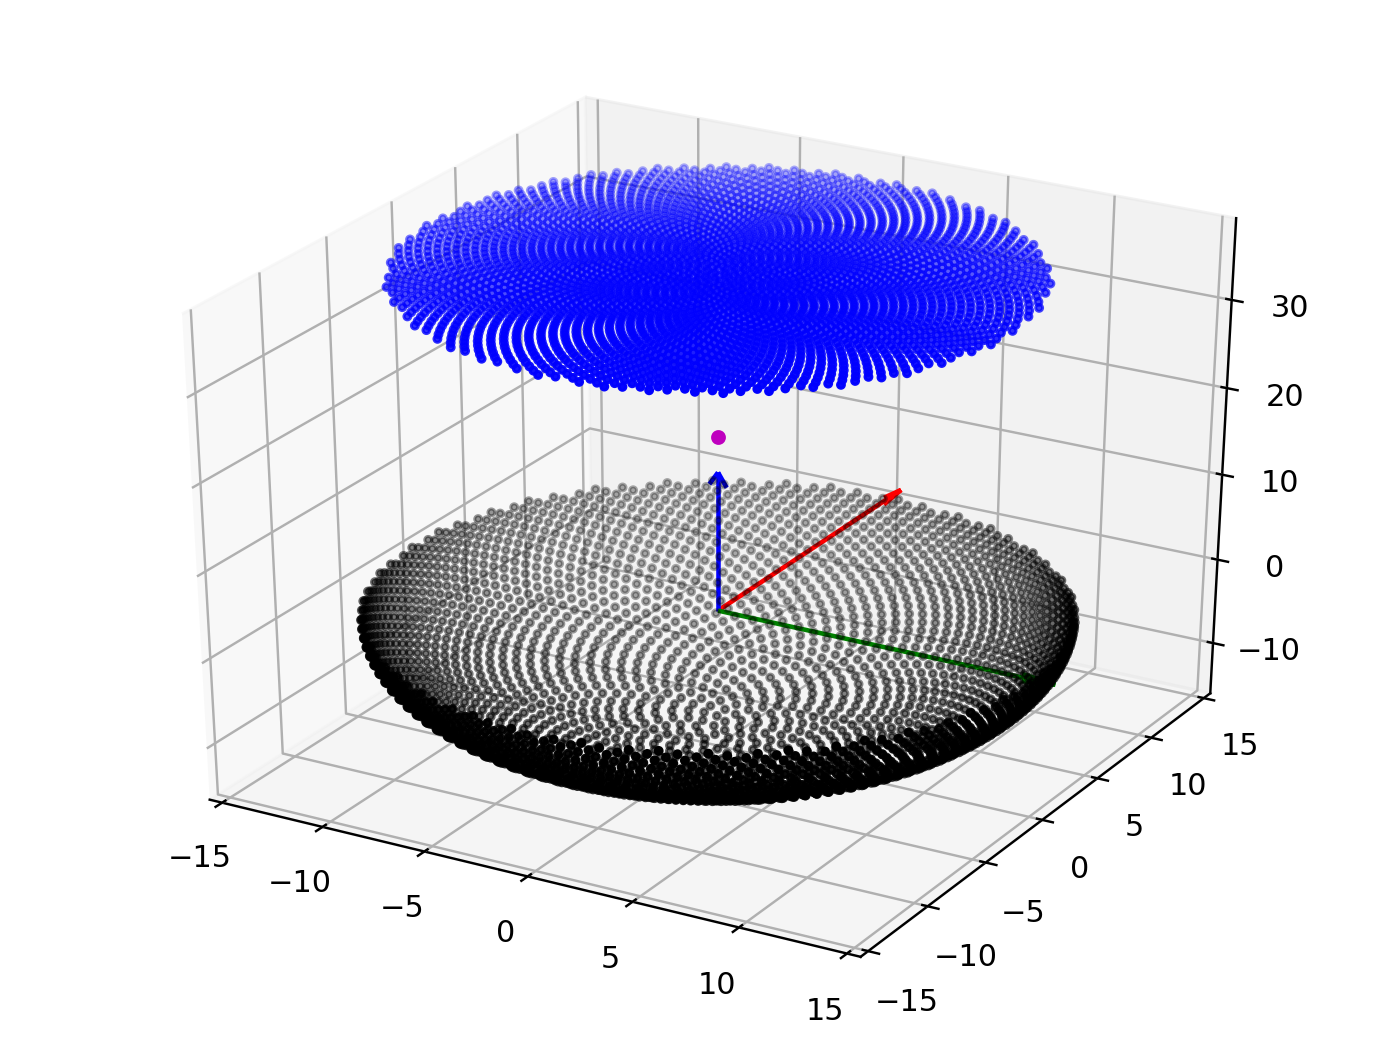

In [306]:
%matplotlib notebook
#Set colours and render
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
#ax.plot_surface(x, y, z,  rstride=1, cstride=1, color='c', alpha=0.1, linewidth=0)

ax.quiver(0, 0, 0, 16, 0, 0, arrow_length_ratio=0.1,color="g") #x
ax.quiver(0, 0, 0, 0, 16, 0, arrow_length_ratio=0.1,color="r") #y
ax.quiver(0, 0, 0, 0, 0, 16, arrow_length_ratio=0.1,color="b") #z

ax.scatter(x,y,z,color="k",s=5)
ax.scatter(x_c,y_c,z_c,color="b",s=5)
ax.scatter(f_point[0],f_point[1],f_point[2],color="m",s=15)

ax.set_xlim([-15,15])
ax.set_ylim([-15,15])
ax.set_zlim([-15,z_plane])

plt.tight_layout()
#plt.show()

<IPython.core.display.Javascript object>


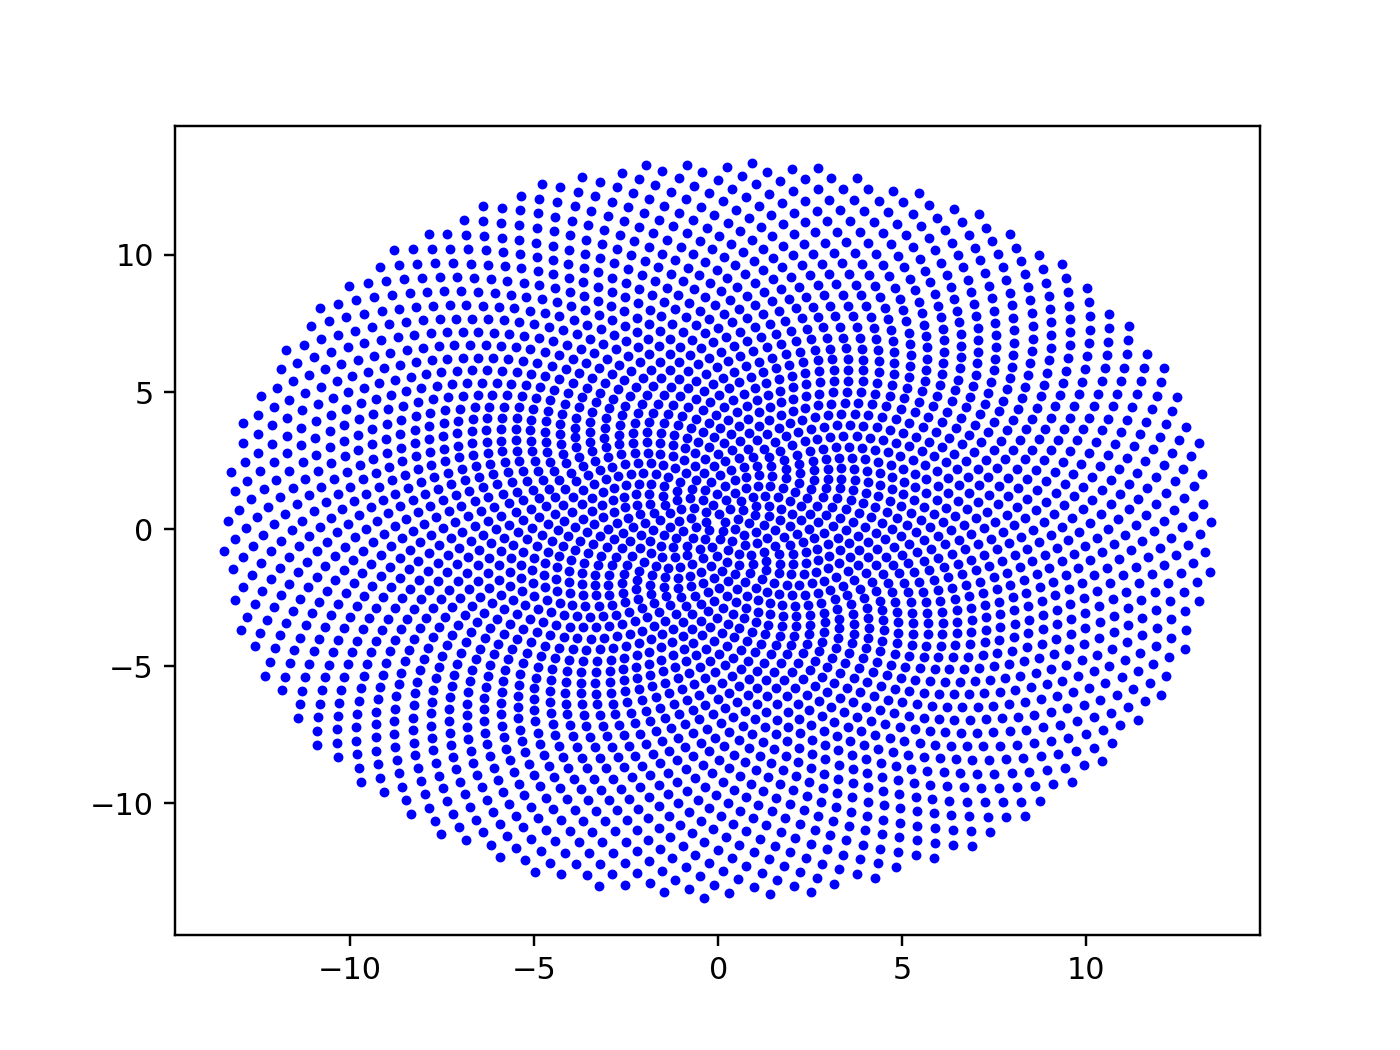

In [297]:
%matplotlib notebook
#Set colours and render
fig = plt.figure()
#plt.scatter(x,y,color="k",s=5)
plt.scatter(x_c,y_c,color="b",s=5)

<IPython.core.display.Javascript object>


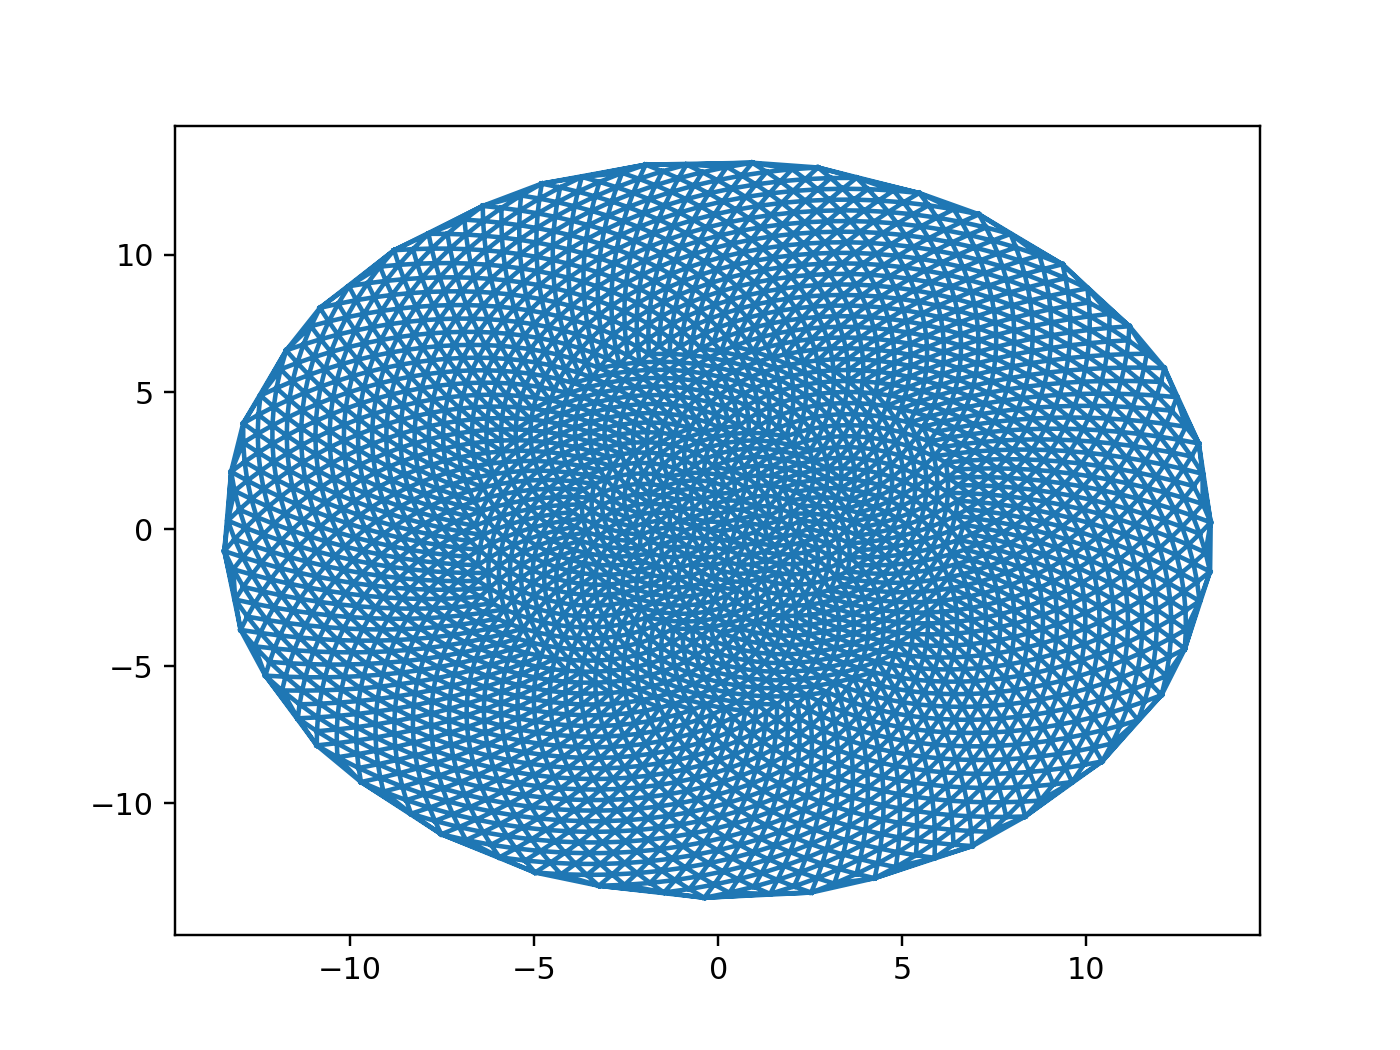

In [299]:
from scipy import spatial
from scipy.spatial import KDTree
from scipy.spatial import Delaunay

points=[]
for i in range (len(x_c)):
    points.append([x_c[i],y_c[i]])
    
points=np.array(points)    
#tree = KDTree(points)    
tri = Delaunay(points)

points_sphere=[]
for i in range (len(x)):
    points_sphere.append([x[i],y[i],z[i]])  
points_sphere=np.array(points_sphere)  
tri_sph = Delaunay(points_sphere)

%matplotlib notebook

fig = plt.figure()
plt.triplot(points[:,0], points[:,1], tri.simplices)



<IPython.core.display.Javascript object>


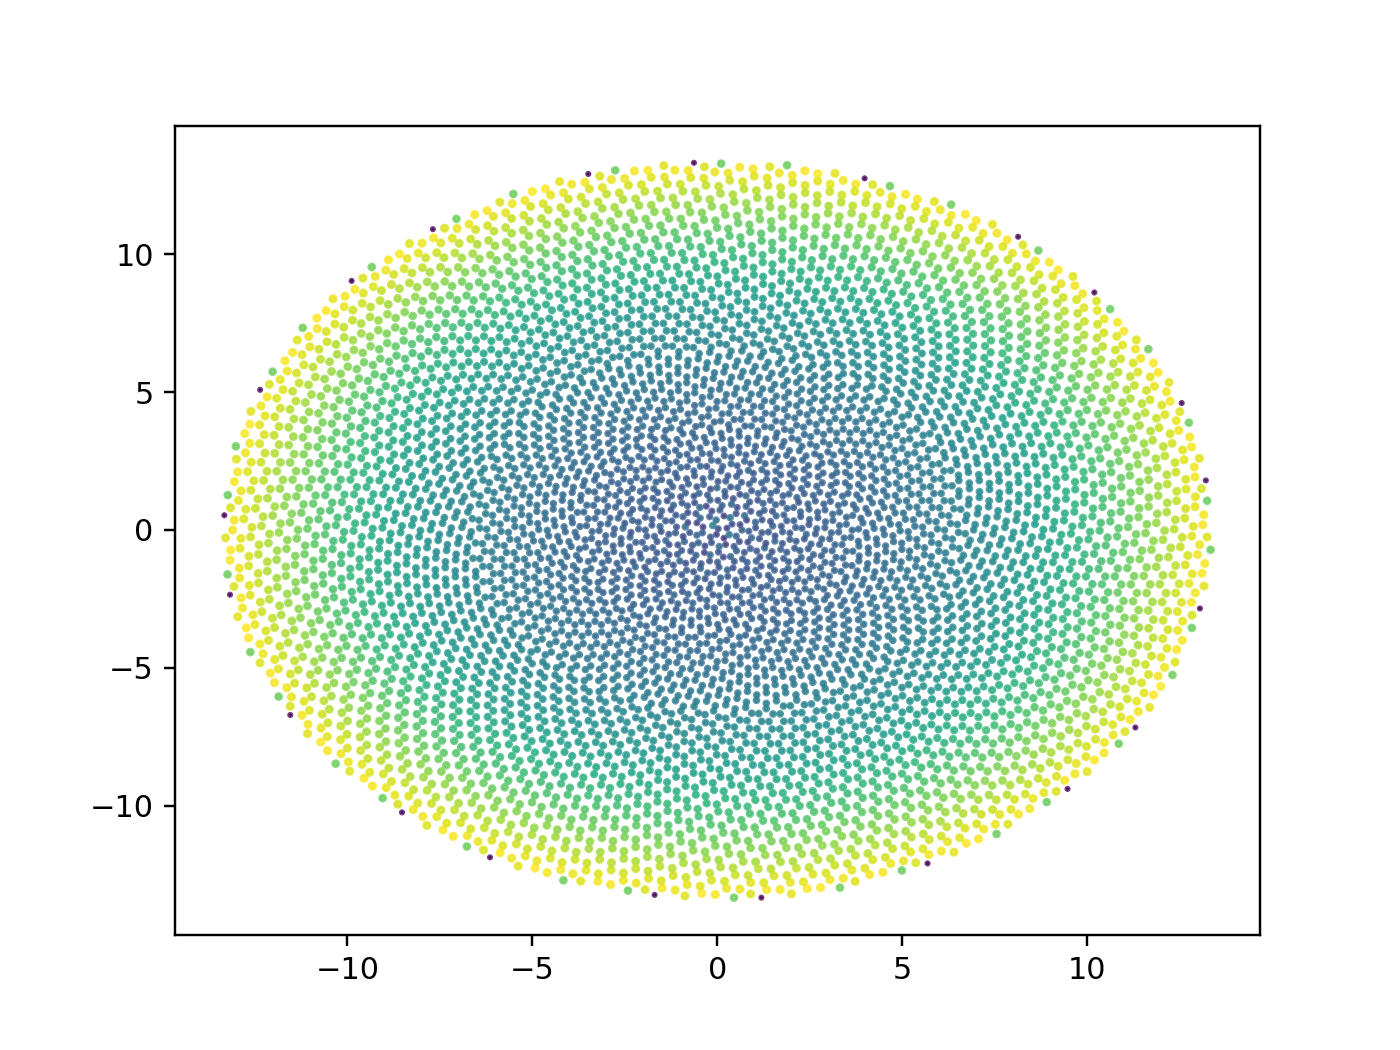

<IPython.core.display.Javascript object>


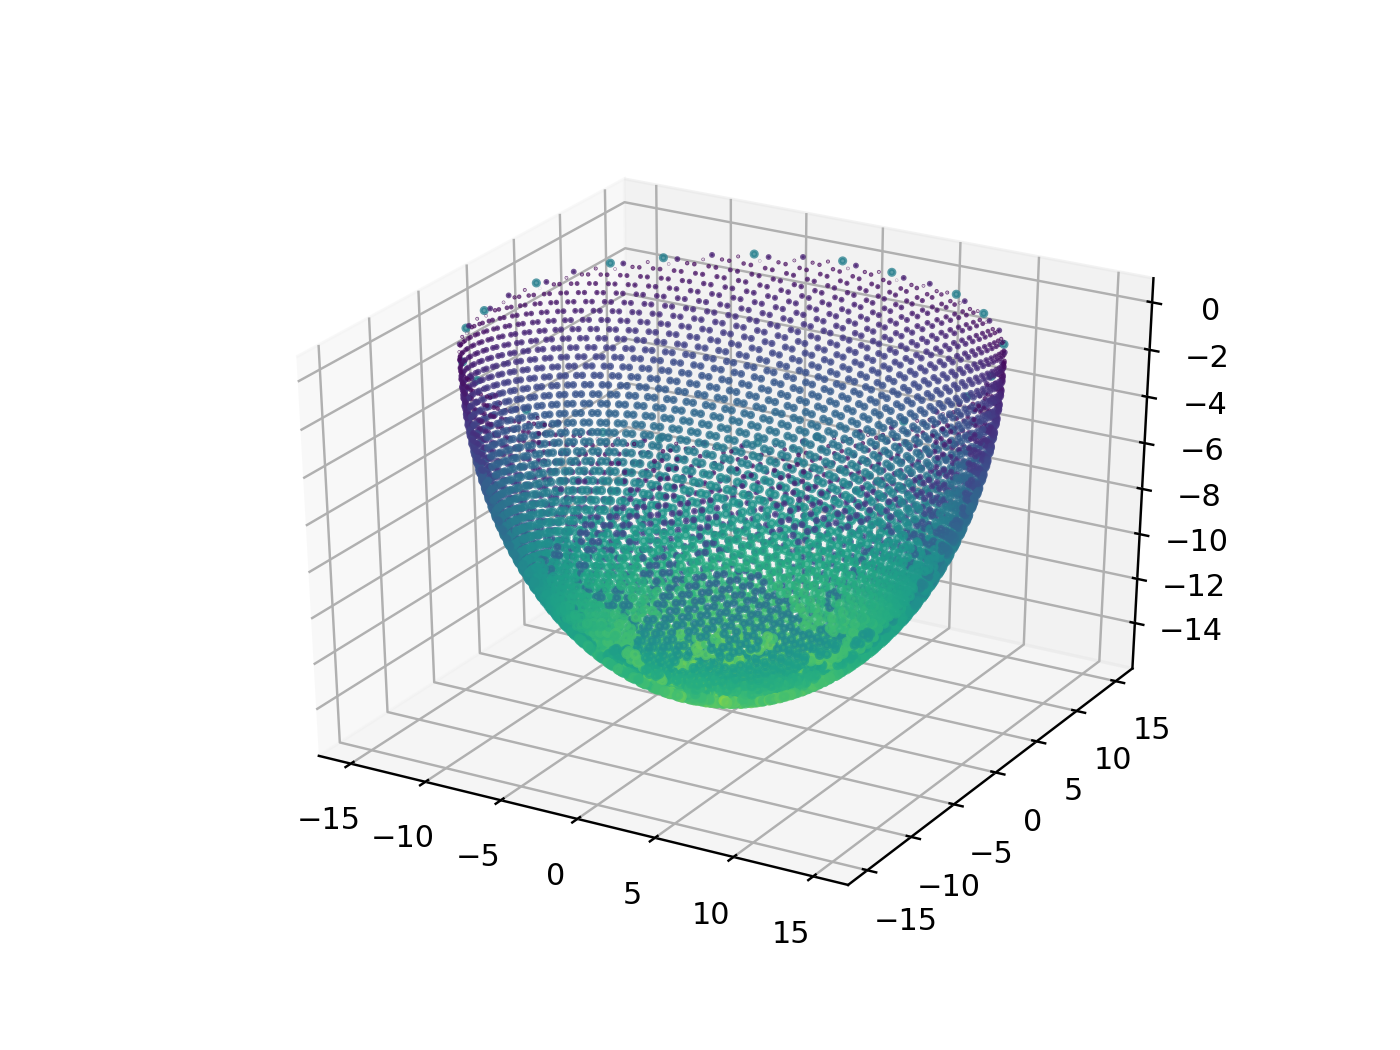

In [300]:
from shapely.geometry import Polygon
#>>> polygon = Polygon([(0, 0), (1, 1), (1, 0)])
#>>> polygon.area


def PolyArea(x,y):
    area= 0.5*np.abs(np.dot(x,np.roll(y,1))-np.dot(y,np.roll(x,1)))
    return area
L=[]
A=[]
C=[]
LS=[]
AS=[]
CS=[]
for s in range(len(tri.simplices)):
    c=tri.simplices[s]
    p=[]    
    for i in range(3):
        p.append(points[c[i]])
    p=np.array(p)
    #A.append(PolyArea(p[:,0],p[:,1]))
    polygon = Polygon(p)
    A.append(polygon.area)
    centroid = (sum(p[:,0] / len(p[:,0])), sum(p[:,1] / len(p[:,1])))
    C.append(centroid)
    ps=[]    
    for i in range(3):
        ps.append(points_sphere[c[i]])
    ps=np.array(ps)
    polygon_s = Polygon(ps)
    AS.append(polygon_s.area)
    cent = (sum(ps[:,0] / len(ps[:,0])), sum(ps[:,1] / len(ps[:,1])), sum(ps[:,2] / len(ps[:,2])))
    CS.append(cent)
    

for tr in tri.vertices:
    for i in range(3):
        edge_idx0 = tr[i]
        edge_idx1 = tr[(i+1)%3]
        p0 = points[edge_idx0]
        p1 = points[edge_idx1]
        L.append(np.linalg.norm(p1 - p0)) 
        
        
for tr in tri_sph.vertices:
    for i in range(3):
        edge_idx0 = tr[i]
        edge_idx1 = tr[(i+1)%3]
        p0 = points_sphere[edge_idx0]
        p1 = points_sphere[edge_idx1]
        LS.append(np.linalg.norm(p1 - p0))        
        
        
L=np.array(L) 
LS=np.array(LS) 
C=np.array(C)
A=np.array(A)
CS=np.array(CS)
AS=np.array(AS)
fig = plt.figure()      
plt.scatter(C[:,0],C[:,1],c=A, s=A*30, cmap='viridis', alpha=0.75)

fig = plt.figure() 
ax = fig.add_subplot(111, projection='3d')     
ax.scatter(CS[:,0],CS[:,1],CS[:,2],c=AS, s=AS*30, cmap='viridis', alpha=0.75)

<IPython.core.display.Javascript object>


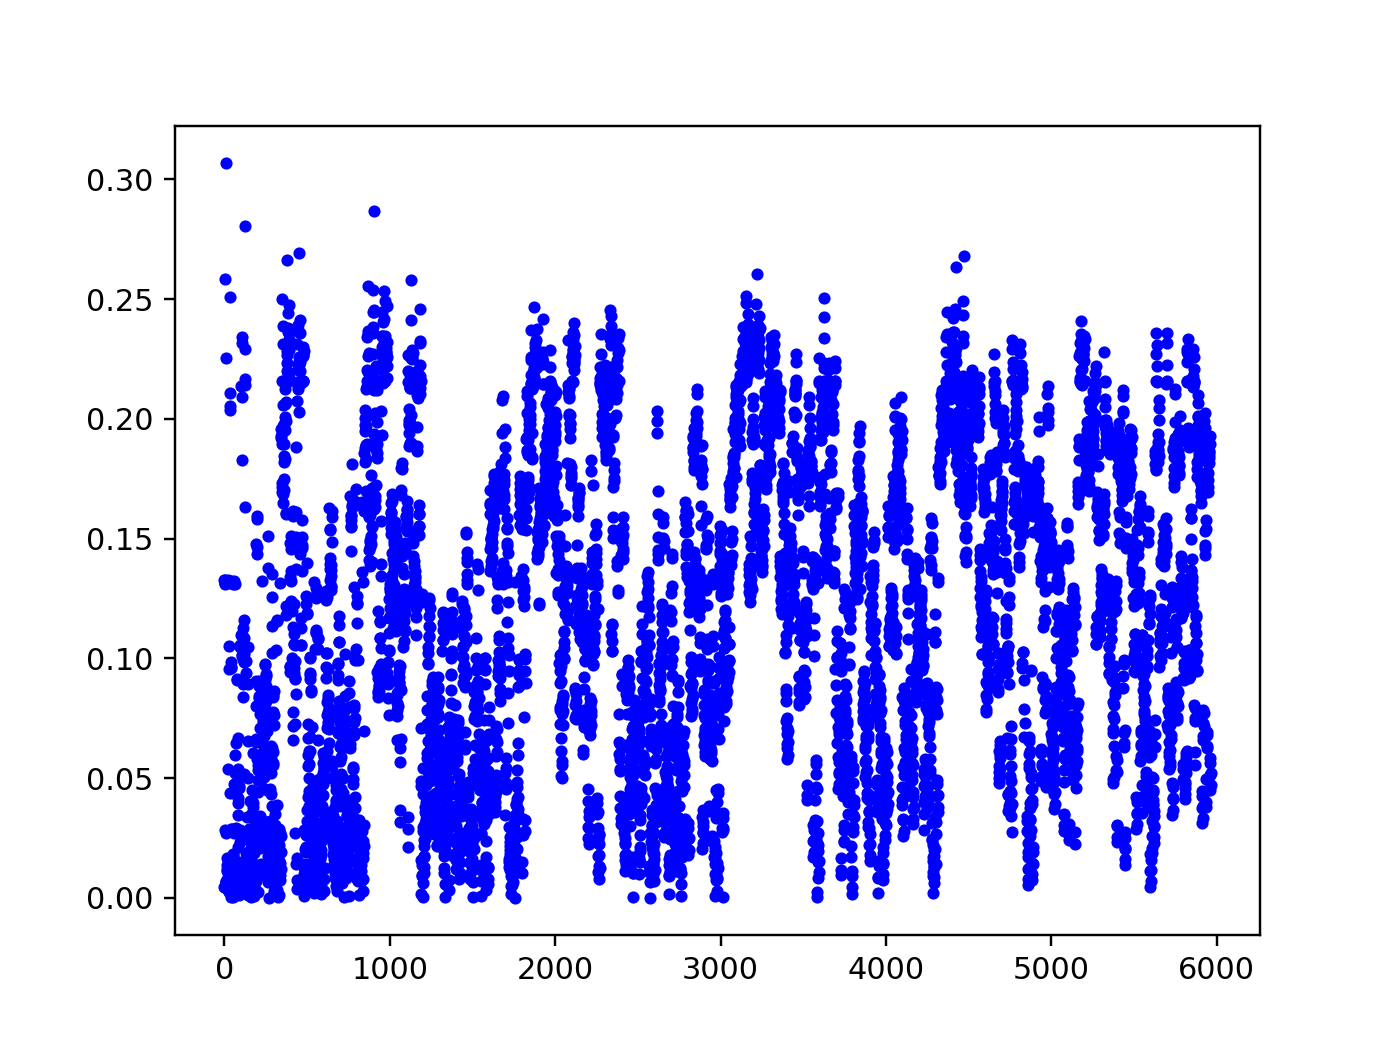

In [301]:

    
#C=np.array(C)
AS=np.array(AS)
fig = plt.figure()      
plt.plot(AS,'b.')
#fig = plt.figure()      
#plt.plot(A,'r.')

In [149]:
CS[:,1]

array([-13.87315842,  14.9688138 ,  14.98050536, ...,  12.42947772,
        11.86991296,  11.94264988])

<IPython.core.display.Javascript object>


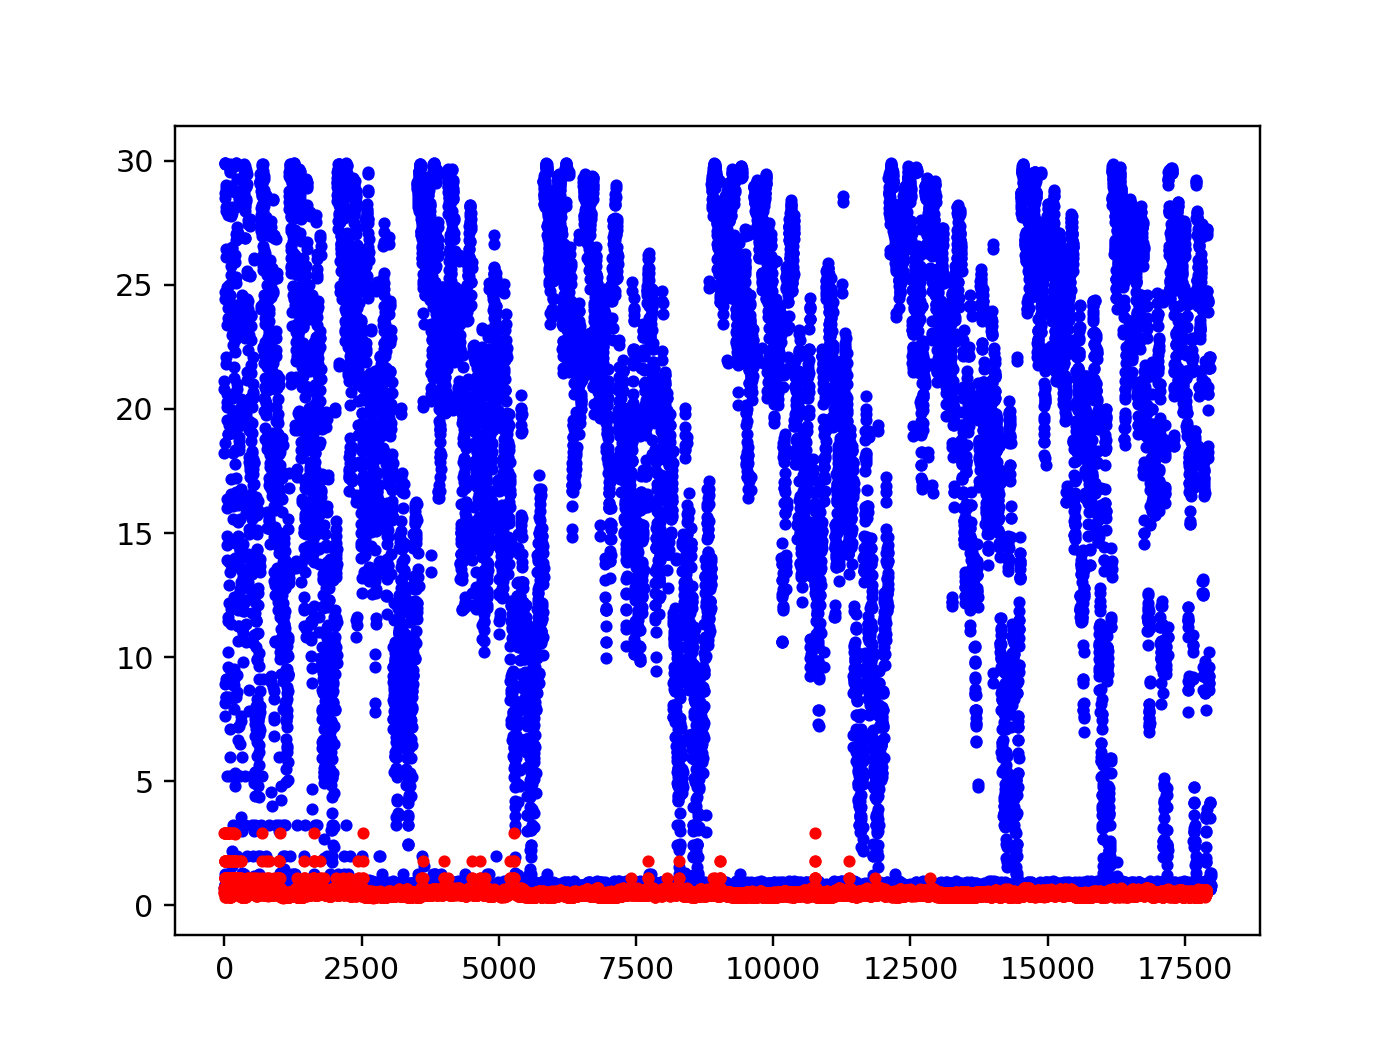

In [302]:
plt.figure()
plt.plot(LS,'b.')
plt.plot(L,'r.')

In [ ]:
#def fibonacci_sphere(samples=1):

#    points = []
#    phi = math.pi * (3. - math.sqrt(5.))  # golden angle in radians

#    for i in range(samples):
#        y = 1 - (i / float(samples - 1)) * 2  # y goes from 1 to -1
#        radius = math.sqrt(1 - y * y)  # radius at y

#        theta = phi * i  # golden angle increment

#        x = math.cos(theta) * radius
#        z = math.sin(theta) * radius

#        points.append((x, y, z))

#    return points

#P=fibonacci_sphere(3000)
#P=np.array(P)
#x0,y0,z0=r*P[:,0],r*P[:,1],r*P[:,2]
#x0,y0,z0=[],[],[]

#https://www.cmu.edu/biolphys/deserno/pdf/sphere_equi.pdf
#n = 300000
#alpha = (4.0*np.pi*r*r)/n
#d = np.sqrt(alpha)
#m_nu = int(np.round(np.pi/d))#int(np.round(np.pi/d))
#d_nu = np.pi/m_nu
#d_phi = alpha/d_nu
#count = 0
#for m in range (0,m_nu):
#    nu = np.pi*(m+0.5)/m_nu
#    m_phi = int(np.round(2*np.pi*np.sin(nu)/d_phi))
#    for n in range (0,m_phi):
#        phi = 2*np.pi*n/m_phi
#        x0.append(r*np.sin(nu)*np.cos(phi))
#        y0.append(r*np.sin(nu)*np.sin(phi))
#        z0.append(r*np.cos(nu))
#        count = count +1

#x0,y0,z0=np.array(x0),np.array(y0),np.array(z0)

#https://web.archive.org/web/20120107030109/http://cgafaq.info/wiki/Evenly_distributed_points_on_sphere#Spirals
# alternative--> https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3223966/#APP1

N=6000
dlong= pi*(3-np.sqrt(5)) # /* ~2.39996323 */
dz= 2.0/N
long= 0
z= 1 - dz/2
node=[]

for k in range(N):
    R = np.sqrt(1-z*z)
    node.append((cos(long)*R, sin(long)*R, z))
    z = z - dz
    long= long + dlong
#node=[]    
#s= 3.6/np.sqrt(N)
#dz= 2.0/N
#long= 0
#z= 1 - dz/2
#for k in range(N):
#    r= np.sqrt(1-z*z)
#    node.append((cos(long)*r, sin(long)*r, z))
#    z= z - dz
#    long= long + s/r


    
node=np.array(node)
r=15
x0,y0,z0=r*node[:,0],r*node[:,1],r*node[:,2]

#space=3
#def my_lin(lb, ub, steps, spacing=space):
#    span = (ub-lb)
#    dx = 1.0 / (steps-1)
#    return [lb + (i*dx)**spacing*span for i in range(steps)]

#lin = my_lin(0, 1, int(N/2))
#lin=np.array(lin)
#lin1=-15*(lin-1)
#lin2=15*(lin-1)
#lin2=np.flip(lin2)
#L=np.concatenate([lin1,lin2])
#z0=L
